<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#3)-Model-Selection---10-Pts" data-toc-modified-id="3)-Model-Selection---10-Pts-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>3) Model Selection - 10 Pts</a></span><ul class="toc-item"><li><span><a href="#N-fold-Cross-Validation" data-toc-modified-id="N-fold-Cross-Validation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>N-fold Cross-Validation</a></span></li><li><span><a href="#a)-Split-the-Data---2pts" data-toc-modified-id="a)-Split-the-Data---2pts-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>a) Split the Data - 2pts</a></span></li><li><span><a href="#b)-Train-and-Test-Loop---4-pts" data-toc-modified-id="b)-Train-and-Test-Loop---4-pts-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>b) Train and Test Loop - 4 pts</a></span></li><li><span><a href="#c)-Apply-N-fold-Cross-Validation---2-pts" data-toc-modified-id="c)-Apply-N-fold-Cross-Validation---2-pts-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>c) Apply N-fold Cross-Validation - 2 pts</a></span></li><li><span><a href="#d)-Interpreting-Results---2-pts" data-toc-modified-id="d)-Interpreting-Results---2-pts-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>d) Interpreting Results - 2 pts</a></span></li><li><span><a href="#e)-Optional---0-pts" data-toc-modified-id="e)-Optional---0-pts-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>e) Optional - 0 pts</a></span></li></ul></li></ul></div>

# 3) Model Selection - 4 Pts
In our last homework we calculated the RMSE of different polynomials. In the last step we seperated the data into a training and a testing set. We applied the polynomial regression only on the training data and them calculated the RMSE on the testing data for each degree. This week we will go a bit further and run through an exemplary model selection process using n-fold cross validation.

In [1]:
# the usual imports
import sys # new one, for error messages.
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
%matplotlib inline

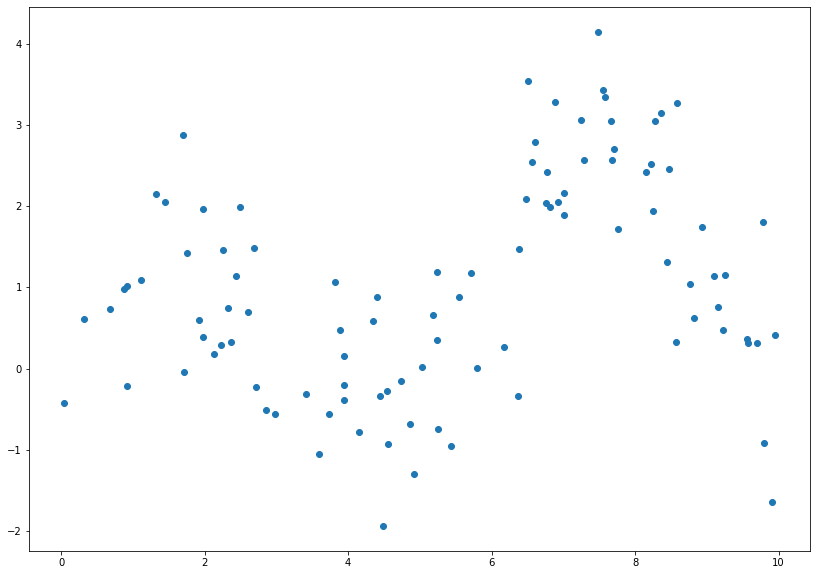

In [2]:
# short definitions of all the functions from the last homework.
def rmse(x,y):
    return np.sqrt(np.sum((x-y)**2)/len(x))

def poly_dm(x,m):
    ϕ = np.ones((len(x), m+1))
    for i in range(1, m+1):
        ϕ[:, i] = x**i
    return ϕ

def pseudoinverse(A):
    return np.dot( np.linalg.inv( np.dot(A.T, A)), A.T)

def poly_regress(x, y, deg):
    ϕ = poly_dm(x, deg)
    pseudo = pseudoinverse(ϕ)
    return np.dot(pseudo,y)

def polynom(x, w):
    y = 0
    for i in range(len(w)):
        y += w[i]*(x**i)        
    return y

# importing the same data, store in X and Y
X, Y = np.loadtxt('poly_data.csv', delimiter=',')

# the target function
def target_func(x):
    return 1.5*np.sin(x) - np.cos(x/2) + 0.5

# visualise dataset  
plt.figure(figsize=(14, 10))
plt.scatter(X,Y)




## N-fold Cross-Validation
Instead of just splitting the dataset into one training and one testing set, we will split the data set into N sets, and use each set for both training and testing. For more details refer to [week 8](https://studip.uni-osnabrueck.de/dispatch.php/course/courseware/?cid=2cef8f5b660c5a9c132d06e82f1bb71e#/structural_element/77530 'studip'). 

## a) Split the Data - 0.5 pts
For n-fold cross-validation we need to have our data split into n equally sized chunks. Ideally we split the data randomly, to have a more representative sample in each chunk.

The following instructions are meant as a help. You may or may not follow them.

(assuming you stored your data in `X` and `Y`)

    * create a 2D array with columns X and Y with shape (100,2)
    
    * shuffle that array (see [```np.random.permutation```](https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html))
    
    * split that array into n chunks and store them in a 3D array with shape (n, 100/n, 2)
    
    * (remember that sometimes complex loops performing data augmentation on arrays can be replaced by a simple numpy function that does exactly what you want with 1 line of code.)

In [3]:
def split_data(x, y, n):
    """ Splits data randomly into n chunks.
    
    Parameters
    ----------
    x,y: 1d numpy arrays
    n: int
    
    Returns
    -------
    chunks: 3d numpy array
    """

    #Your code here
    
    chunks = np.array(np.array_split(np.random.permutation(np.stack((X,Y), axis=1)),n))
    
    return chunks

    

## b) Train and Test Loop - 2 pts
Now we can  write a function that trains a polynomial model of a certain degree. The function should receive the number of chunks that the data is split into and the test ratio which determines the proportion of chunks that are used for testing. 
The following instructions are meant as a help. You may or may not follow them.


    * calculate the number of test chunks

    * iterate over total number of chunks and for each chunk:

        * determine which chunks are used for training and for testing

        * unite the training chunks into one array

        * Perform polynomial regression over the training data to obtain the model parameters

        * Use the model parameters to compute y values for the test chunk

        * compute RMSE between model prediction and target values of the test chunk

        * append the error to a list

    * return the list of errors as array

In [4]:
def train_test(chunks, degree, test_ratio=0.1):
    """ Uses the ratio to determine a set of chunks to train on and then test using the remaining
    
    Parameters
    ----------
    chunks: 3d numpy array
    degree: int
    test_ratio: float
    
    Returns
    -------
    errors: 1d numpy array
    """

    #Your code here
    
    errors = []
    
    #calculate the number of test chunks
    nr_testchunks = int(test_ratio*len(chunks))
    
    #find all combinations of all test chunks
    for comb in combinations(range(len(chunks)), nr_testchunks):  
        test_chunks=[]
        train_chunks=[]
        for i in range(len(chunks)):
            if i in comb:
                test_chunks.append(chunks[i])
            else:
                train_chunks.append(chunks[i])
         
        # concatenate train and test
        test_data = np.concatenate(test_chunks)
        train_data = np.concatenate(train_chunks)
        
        # regress and test
        model_parameters = poly_regress(train_data[:,0], train_data[:,1], degree)
        y_hat = polynom(test_data[:,0], model_parameters)
        errors.append(rmse(test_data[:,1], y_hat))
    
    #print(errors)
    return np.array(errors)


In [5]:
np.random.seed(1)
test = np.array(np.array_split(np.random.permutation(np.array([X,Y]).T),10))
result = np.array([0.83, 1.52, 1.11, 1.10, 1.33, 1.53, 1.44, 1.58, 1.19, 1.2])
train_test(test, 2)

array([0.8385475 , 1.52373461, 1.11471193, 1.10165039, 1.33569499,
       1.53152511, 1.44317387, 1.58173139, 1.19595991, 1.20072863])

## c) Apply N-fold Cross-Validation - 1 pts
Finally we want to train and test our polynomial regression models using our n-fold cross-validation. Since we get an error value for each iteration, we need to calculate some meta statistic we can compare. For this we will look at the mean and standard deviation of the errors for each degree. 

Apply the n-fold cross validation for polynomials of degree 1, ..., 10 and plot the results. 
Śplit the data into 10 chunks, 3 of which are always used for testing.

The following instructions are meant as a help. You may or may not follow them.
    * split the data
    
    * for each degree
    
        * train and test the polynomial regression
        
        * store the mean and standard deviation of the errors in a list
        
    * plot the results
   

Text(0, 0.5, 'std')

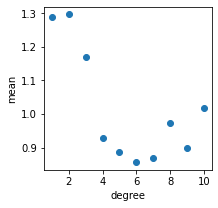

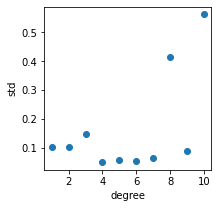

In [6]:
# we seed the random shuffling for more consistent results
np.random.seed(42)

#Your code here

data = split_data(X,Y,10)
degree = list(range(1,11))

mean = []
std = []
for i in degree:
    mean.append(np.mean(train_test(data,i,0.3)))
    std.append(np.std(train_test(data,i,0.3)))



#plot the result
#mean
plt.figure(figsize=(3, 3))
plt.scatter(degree,mean)
plt.xlabel("degree")
plt.ylabel("mean")


#std
plt.figure(figsize=(3,3))
plt.scatter(degree,std)
plt.xlabel("degree")
plt.ylabel("std")


## d) Interpreting Results - 0.5 pts
**How does the mean and the standard deviation behave for the different degrees?**

**Which polynomial is best suited to model the data? Explain your choice.**

The mean error is high for small degrees and gets lower for higher degrees (at the end there is a slight uptick though). The standard deviation is lowest for degrees in the middle and highest for high degrees (with the exception of degree=9). A polynomial around 6 degrees seems to perform the best on the standard deviation and the mean. The polynomial has the lowest mean and low deviation. So the errors have a minimum at a polynomial order of 6. This reflects the insights of the bias-variance tradeoff. The standard deviation is related to the variance of the models and the mean error is related to the bias.

## e) Optional - 0 pts

Try out the code from 1.4 using only 1/5 of the data for testing. How does that affect the result?

It decreases the accuracy

Ignore the cell below

In [223]:
try:
    np.random.seed(1)
    test = np.array(np.array_split(np.random.permutation(np.array([X,Y]).T),10))
    np.random.seed(1)
    print('Data split looks okay!') if np.array_equal(test, split_data(X,Y, 10)) else print("Some elements in data split aren't correct.")
except:
    print('There is an error in the data_split function.')
    
try:
    np.random.seed(1)
    test = np.array(np.array_split(np.random.permutation(np.array([X,Y]).T),10))
    result = np.array([0.83, 1.52, 1.11, 1.10, 1.33, 1.53, 1.44, 1.58, 1.19, 1.2])
    print('Train_test looks good!') if np.allclose(np.array(train_test(test, 2)), result, atol=0.01) else print('Train_test returns some different values.')
except:
    print('There is an error in the train_test function.')

Data split looks okay!
[0.8385474969965726, 1.5237346080506033, 1.114711930187173, 1.1016503891562432, 1.3356949856424776, 1.5315251066310611, 1.4431738735242823, 1.581731389695545, 1.1959599063822581, 1.2007286270568092]
Train_test looks good!
